In [2]:
import pandas as pd #Python for Data Analysis
from datetime import datetime #Libraary satuan waktu
import matplotlib.pyplot as plt #Matplotlib: Math Plotting Library vs Seaborn: Plotting Machine Learning

In [3]:
url = url = "https://docs.google.com/spreadsheets/d/1Vbnp9-LIADE-RY5Ehycin-DLURk3PYwOBF9NwXdfiNw/export?format=csv"

In [6]:
df = pd.read_csv(url)
df.head()

,customer_id,full_name,birth_date,gender,marital_status,occupation,education_level,income_range,religion,country,...,brand_loyalty_score,purchase_frequency,last_purchase_date,avg_order_value,total_orders,preferred_channel,benefits_sought,feedback_score,age,generasi
0,CUST0001,A** W*****,3/14/1988,Female,Single,"Production designer, theatre/television/film",D3,5-10M,Katolik,Indonesia,...,4,Non-user,2025-11-27,"309,139",17,Offline,"['Estetika', 'Fungsi']",5,37,Millennial
1,CUST0002,E***** S******,3/30/2000,Male,Single,Professor Emeritus,SMA,>10M,Katolik,Indonesia,...,3,Light,2025-07-30,"1,695,262",14,Social Media,['Ramah Lingkungan'],2,25,Gen Z
2,CUST0003,C****** P*******,6/6/2003,Male,Married,Equality and diversity officer,SMA,<5M,Islam,Indonesia,...,6,Medium,2025-11-19,"1,028,552",16,Offline,['Hemat'],3,22,Gen Z
3,CUST0004,C**** S******,2/9/1985,Male,Married,"Therapist, nutritional",D3,>10M,Katolik,Indonesia,...,10,Light,2025-12-09,"2,145,693",18,App,['Hemat'],1,40,Millennial
4,CUST0005,S****** S********,5/29/1999,Male,Married,Operational researcher,D3,>10M,Budha,Indonesia,...,8,Medium,2025-09-07,"2,060,548",21,Social Media,['Ramah Lingkungan'],4,26,Gen Z


In [7]:
df_masked=df.copy()

In [8]:
df_masked.describe()

,brand_loyalty_score,total_orders,feedback_score,age
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.494000,12.945000,3.004000,32.297000
std,2.892461,7.540081,1.401409,7.499803
min,1.000000,0.000000,1.000000,20.000000
25%,3.000000,6.000000,2.000000,26.000000
50%,6.000000,14.000000,3.000000,32.000000
75%,8.000000,20.000000,4.000000,39.000000
max,10.000000,25.000000,5.000000,45.000000


In [9]:
df.isnull().sum()

,0
customer_id,0
full_name,0
birth_date,0
gender,0
marital_status,0
occupation,0
education_level,0
income_range,0
religion,0
country,0


In [10]:
#Tambahkan kolom usia
today = pd.to_datetime('today')
df_masked["birth_date"] = pd.to_datetime(df_masked["birth_date"])
df_masked["age"] = df_masked["birth_date"].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))

In [11]:
today

Timestamp('2026-01-21 12:57:24.645892')

In [12]:
#Membuat fungsi segmentasi
def assign_segment(row):
    age = row["age"]
    area = row["area_type"]
    lifestyle = row["lifestyle_segment"]
    channel = row["preferred_channel"]
    marital = row["marital_status"]
    values = row["personal_values"]
    avg_order = row["avg_order_value"]
    last_purchase = pd.to_datetime(row["last_purchase_date"])
    months_since_last_purchase = (today.year - last_purchase.year) * 12 + (today.month - last_purchase.month)

    # Segment A: Urban Minimalist
    if 25 <= age <= 35 and area == "Urban" and "Minimalist" in lifestyle and channel == "App":
        return "Segment A: Urban Minimalist"

    # Segment B: Eco Family
    elif marital == "Married" and area == "Suburban" and "Sustainability" in values:
        return "Segment B: Eco Family"

    # Segment C: Dormant High Value
    elif 35 <= age <= 45 and avg_order > 5000000 and months_since_last_purchase >= 3:
        return "Segment C: Dormant High Value"

    return "Other"

In [14]:
#Pastikan kolom numerik bertipe float atau int
df_masked["avg_order_value"] = pd.to_numeric(df_masked["avg_order_value"], errors='coerce')
df_masked["brand_loyalty_score"] = pd.to_numeric(df_masked["brand_loyalty_score"], errors='coerce')
df_masked["total_orders"] = pd.to_numeric(df_masked["total_orders"], errors='coerce')

In [15]:
#Terapkan fungsi segmentation
df_masked["customer_segment"] = df_masked.apply(assign_segment, axis=1)

In [17]:
segment_counts = df_masked["customer_segment"].value_counts()
segment_counts

,count
customer_segment,
Other,940
Segment B: Eco Family,45
Segment A: Urban Minimalist,15


In [18]:
#Lihat sample data dari tiap segmen
df_masked.groupby("customer_segment").head(3)[[
    "customer_id", "full_name", "age", "area_type", "lifestyle_segment",
    "marital_status", "personal_values", "preferred_channel",
    "avg_order_value", "last_purchase_date", "customer_segment"
]]

,customer_id,full_name,age,area_type,lifestyle_segment,marital_status,personal_values,preferred_channel,avg_order_value,last_purchase_date,customer_segment
0,CUST0001,A** W*****,37,Rural,Eco-conscious,Single,"['Efficiency', 'Prestige']",Offline,NaN,2025-11-27,Other
1,CUST0002,E***** S******,25,Suburban,Family-oriented,Single,"['Sustainability', 'Community']",Social Media,NaN,2025-07-30,Other
2,CUST0003,C****** P*******,22,Rural,Minimalist,Married,"['Efficiency', 'Prestige']",Offline,NaN,2025-11-19,Other
25,CUST0026,P*** G**** U*****,24,Suburban,Eco-conscious,Married,"['Sustainability', 'Community']",App,NaN,2025-08-30,Segment B: Eco Family
48,CUST0049,P**** S******,23,Suburban,Luxury seeker,Married,"['Sustainability', 'Community']",App,NaN,2025-08-10,Segment B: Eco Family
55,CUST0056,T**** H********,29,Suburban,Luxury seeker,Married,"['Sustainability', 'Community']",App,NaN,2026-01-07,Segment B: Eco Family
114,CUST0115,I** D**** S******* S******,27,Urban,Minimalist,Single,"['Efficiency', 'Prestige']",App,NaN,2026-01-01,Segment A: Urban Minimalist
253,CUST0254,D** R**** N****** S***,32,Urban,Minimalist,Married,"['Sustainability', 'Community']",App,NaN,2025-11-08,Segment A: Urban Minimalist
343,CUST0344,F********* N*********,31,Urban,Minimalist,Single,"['Freedom', 'Minimalism']",App,NaN,2025-11-29,Segment A: Urban Minimalist


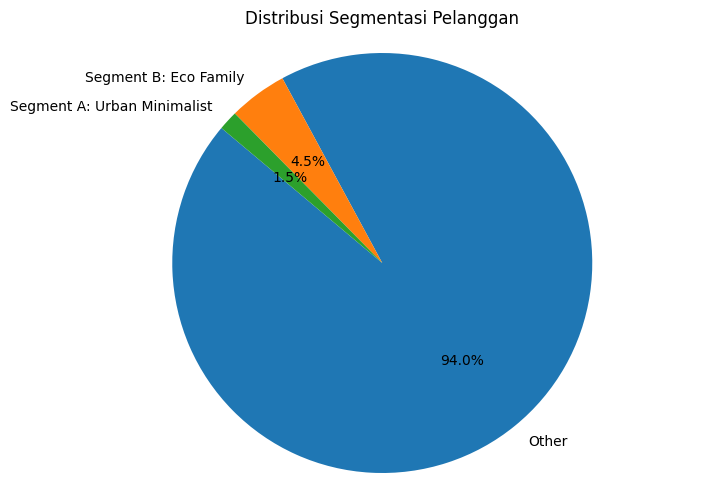

In [19]:
#Pie Chart
import matplotlib.pyplot as plt
segment_counts = df_masked["customer_segment"].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribusi Segmentasi Pelanggan")
plt.axis('equal')
plt.show()

Machine Learning Models

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
urls = "https://docs.google.com/spreadsheets/d/1AuORTAdlUn1nU4Sfxn5VqZFAAFugAFd408oXQJIpmnE/export?format=csv"

In [22]:
df = pd.read_csv(urls)
df.head()

,customer_id,first_name,last_name,email,signup_date,city,state,country,total_orders,total_spent,avg_order_value,last_order_date,days_since_last_order,top_category,favorite_channel
0,69814,Brandon,Vazquez,brandonvazquez@example.net,2025-06-10,NaN,Acre,Brasil,0,0.0,0.0,NaN,999,NaN,Display
1,66657,George,Sims,georgesims@example.com,2025-06-04,NaN,Acre,Brasil,0,0.0,0.0,NaN,999,NaN,Organic
2,18439,Daniel,Willis,danielwillis@example.net,2024-11-03,Tarauacá,Acre,Brasil,0,0.0,0.0,NaN,999,NaN,Search
3,48367,Jason,Dawson,jasondawson@example.com,2022-03-01,Tarauacá,Acre,Brasil,0,0.0,0.0,NaN,999,NaN,Search
4,58739,John,Jones,johnjones@example.org,2025-08-25,Tarauacá,Acre,Brasil,0,0.0,0.0,NaN,999,NaN,Search


In [23]:
#Cluster Col
X = df[["days_since_last_order","total_orders","total_spent","avg_order_value"]]

In [24]:
#Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
#Clustering
kmeans = KMeans(n_clusters = 4, random_state=42)
df['cluster_label'] = kmeans.fit_predict(X_scaled)

df.cluster_label.value_counts()

,count
cluster_label,
1,44566
2,23302
3,16368
0,15764


/tmp/ipython-input-589168722.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster_label', data=df, palette='husl')


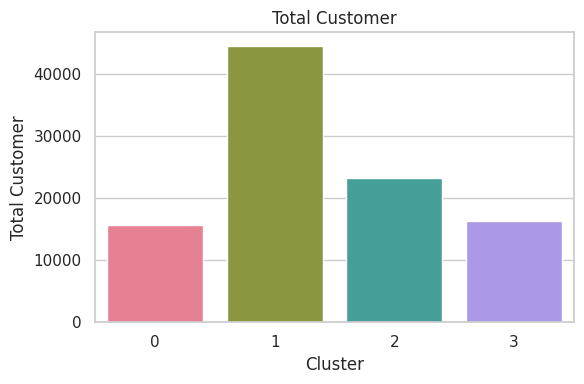

In [45]:
#Set style seaborn
sns.set(style="whitegrid")

# Visualisasi 1: Jumlah pelanggan per cluster
plt.figure(figsize=(6, 4))
sns.countplot(x='cluster_label', data=df, palette='husl')
plt.title("Total Customer")
plt.xlabel("Cluster")
plt.ylabel("Total Customer")
plt.tight_layout()
plt.show()

Interpretation:

Cluster 1 merupakan kelompok dengan Total Customer tertinggi karena customer di Cluster ini menunjukkan aktivitas yang lebih sering daripada cluster lainnya. Dominasi jumlah customer menunjukkan sebagian besar memiliki karakteristik yang relatif homogen dan dikelompokkan ke dalam satu segmen utama.

/tmp/ipython-input-1410842888.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_label', y='total_spent', data=df, palette='husl')


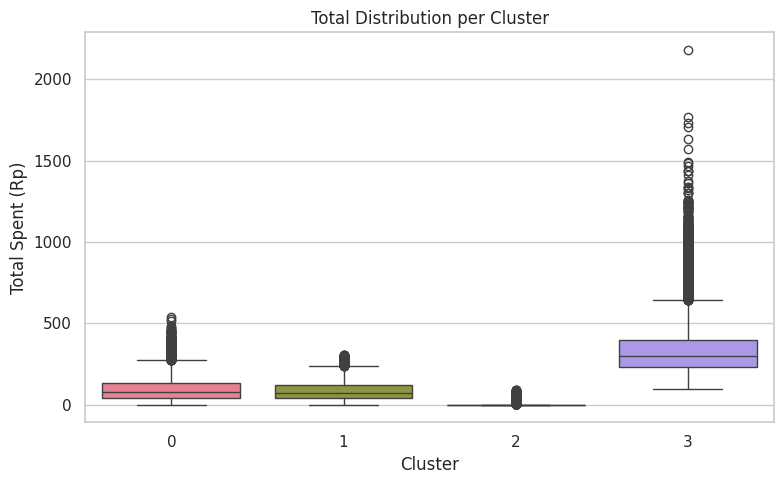

In [46]:
# Visualisasi 2: Boxplot Total Spent per Cluster
plt.figure(figsize=(8, 5))
sns.boxplot(x='cluster_label', y='total_spent', data=df, palette='husl')
plt.title("Total Distribution per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Spent (Rp)")
plt.tight_layout()
plt.show()

Interpretation:

Cluster 3 menunjukkan tingkat total pengeluaran tertinggi dibandingkan cluster lainnya. Nilai pengeluaran customer yang sangat tinggi menunjukkan bahwa cluster ini mmencakup pelanggan dengan daya tarik serta purchasing yang tinggi dan re-purchase yang intensif. Cluster ini menunjukkan segmentasi high value customers.

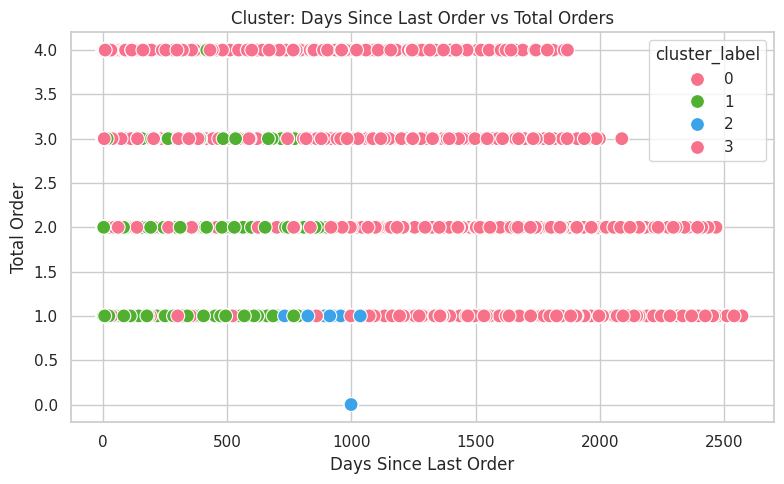

In [47]:
#Visualisasi 3: Scatter plot Total Orders vs Days Since Last Order
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='days_since_last_order',
    y='total_orders',
    hue='cluster_label',
    data=df,
    palette='husl',
    s=100
)
plt.title("Cluster: Days Since Last Order vs Total Orders")
plt.xlabel("Days Since Last Order")
plt.ylabel("Total Order")
plt.tight_layout()
plt.show()

Interpretation:

Variabel Days Since Last Order menunjukkan recency dari aktivitas transaksi, sedangkan Total Orders merupakan frekuensi pembelian pelanggan.

Nilai Days Since Last Order yang relatif tinggi dengan sebaran yang luas ada pada Cluster 3. Customer dalam cluster ini memiliki TOtal Orders yang variatif. Pola ini menunjukkan pada cluster 3 terdiri dari pelanggan yang pernah aktif melakukan pembelian dalam jumlah tertentu, namun telah lama tidak melakukan transaksi kembali.

/tmp/ipython-input-1913129685.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster_label', y='avg_order_value', data=df, palette='husl')


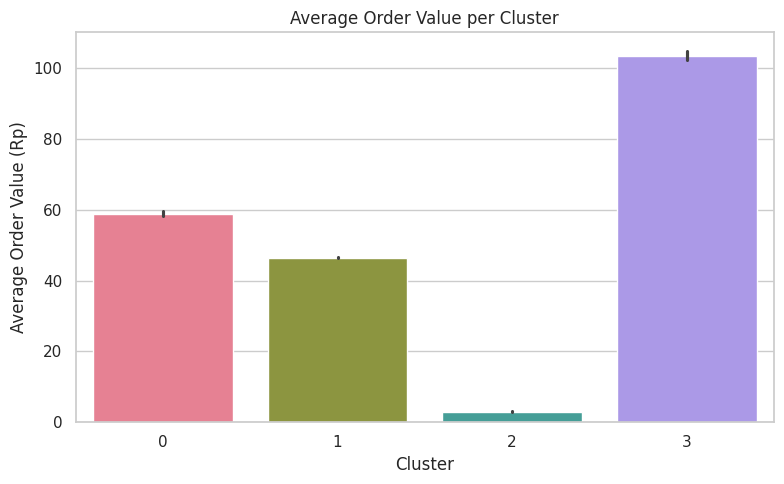

In [48]:
plt.figure(figsize=(8, 5))
sns.barplot(x='cluster_label', y='avg_order_value', data=df, palette='husl')
plt.title('Average Order Value per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Order Value (Rp)')
plt.tight_layout()
plt.show()

Interpretation:

Average Order Value menunjukkan besarnya nilai transaksi rata-rata yang dilakukan oleh pelanggan dalam setiap pesanan, sehingga mencerminkan tingkat pengeluaran per transaksi.

Cluster 3 menunjukkan nilai Average Order Value tertinggi dibandingkan cluster lainnya yaitu lebih dari Rp100. Customers dalam cluster ini cenderung melakukan transaksi dengan nominal yang besar pada setiap pesanan. Cluster ini merupakan segmentasi pelanggan dengan daya beli yang tinggi dan transaksi dengan nilai yang besar, meskipun jumlah pelanggannya relatif lebih sedikit dibandingkan cluster lain.